In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import time
import tqdm.notebook as tqdm

from pathlib import Path

%matplotlib inline


import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D

In [3]:
DATA_DIR_PATH = "../data/bengali_AI_handwritten_grapheme_classification"

IMG_HEIGHT = 137
IMG_WIDTH = 236

ROOT_CLASSES_NUM = 168
CONSONANT_CLASSES_NUM = 7
VOWEL_CLASSES_NUM = 11

In [4]:
original_train_df = pd.read_csv("{}/train.csv".format(DATA_DIR_PATH))
test_df = pd.read_csv("{}/test.csv".format(DATA_DIR_PATH))
class_map_df = pd.read_csv("{}/class_map.csv".format(DATA_DIR_PATH))
sample_submission_df = pd.read_csv("{}/sample_submission.csv".format(DATA_DIR_PATH))

In [5]:
sample_submission_df

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0
5,Test_1_vowel_diacritic,0
6,Test_2_consonant_diacritic,0
7,Test_2_grapheme_root,0
8,Test_2_vowel_diacritic,0
9,Test_3_consonant_diacritic,0


In [6]:
class_map_df

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র


In [7]:
original_train_df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [8]:
test_df

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root
5,Test_1_vowel_diacritic,Test_1,vowel_diacritic
6,Test_2_consonant_diacritic,Test_2,consonant_diacritic
7,Test_2_grapheme_root,Test_2,grapheme_root
8,Test_2_vowel_diacritic,Test_2,vowel_diacritic
9,Test_3_consonant_diacritic,Test_3,consonant_diacritic


In [9]:
def reshape_img(img_data):
    if isinstance(img_data, pd.Series):
        img_data = img_data.to_numpy()
    
    return img_data.reshape(IMG_HEIGHT, IMG_WIDTH)

In [10]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [11]:
original_train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [12]:
CENTERED_IMAGE_PATH = "../data/bengali_centered"
PREPROCESSED_TRIAN_DATA_CSV_NAME = "new_train_data.csv"

In [13]:
def update_df_with_image_path(df: pd.DataFrame, dataset_name_list: list):
    image_path_list = list()

    for dataset_name in dataset_name_list:
        image_path_data_list = list()
        centered_image_dataset_path = os.path.join(CENTERED_IMAGE_PATH, dataset_name)

        for file in sorted(os.listdir(centered_image_dataset_path)):
            image_id, ext = os.path.splitext(file)

            if ext != ".jpg":
                continue

            idx = int(image_id.split("_")[-1])
            path_data = (idx, image_id, os.path.join(centered_image_dataset_path, file))

            image_path_data_list.append(path_data)

        image_path_data_list = sorted(image_path_data_list, key=lambda path_data: path_data[0])
        image_path_list_in_dataset = list(list(zip(*image_path_data_list))[2])
        image_path_list += image_path_list_in_dataset

    df['preprocessed_image_path'] = image_path_list

In [14]:
# update_df_with_image_path(df=original_train_df, dataset_name_list=["dataset_1", "dataset_2", "dataset_3", "dataset_4"])
# original_train_df.to_csv(os.path.join(CENTERED_IMAGE_PATH, PREPROCESSED_TRIAN_DATA_CSV_NAME), mode='w', index=False)

preprocessed_train_df = pd.read_csv(os.path.join(CENTERED_IMAGE_PATH, PREPROCESSED_TRIAN_DATA_CSV_NAME))

In [15]:
preprocessed_train_df.tail()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,preprocessed_image_path
200835,Train_200835,22,7,2,র্খে,../data/bengali_centered/dataset_4/Train_20083...
200836,Train_200836,65,9,0,ত্তো,../data/bengali_centered/dataset_4/Train_20083...
200837,Train_200837,2,1,4,অ্যা,../data/bengali_centered/dataset_4/Train_20083...
200838,Train_200838,152,9,0,স্নো,../data/bengali_centered/dataset_4/Train_20083...
200839,Train_200839,127,2,0,ল্টি,../data/bengali_centered/dataset_4/Train_20083...


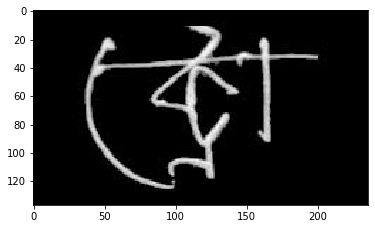

In [16]:
img = cv2.imread(preprocessed_train_df['preprocessed_image_path'][0])
plt.imshow(img, cmap='gray')
plt.show()

In [17]:
ROOT_CLASSES_NUM = 168
CONSONANT_CLASSES_NUM = 7
VOWEL_CLASSES_NUM = 11

In [18]:
from sklearn.model_selection import train_test_split

In [125]:
path_list = preprocessed_train_df['preprocessed_image_path']

root_list = preprocessed_train_df['grapheme_root']
consonant_list = preprocessed_train_df['consonant_diacritic']
vowel_list = preprocessed_train_df['vowel_diacritic']

In [126]:
# x_train_path, y_test_path, y_train_root, y_test_root, y_train_consonant, y_test_consonant, y_train_vowl, y_test_vowel = \
#     train_test_split(path_list, root_one_hot_list, consonant_one_hot_list, vowel_one_hot_list, test_size=0.3)

In [127]:
x_train_path, y_test_path, y_train_root, y_test_root, y_train_consonant, y_test_consonant, y_train_vowl, y_test_vowel = \
    train_test_split(path_list, root_list, consonant_list, vowel_list, test_size=0.3)

In [128]:
x_train_path

87499     ../data/bengali_centered/dataset_2/Train_87499...
75515     ../data/bengali_centered/dataset_2/Train_75515...
95056     ../data/bengali_centered/dataset_2/Train_95056...
100572    ../data/bengali_centered/dataset_3/Train_10057...
144608    ../data/bengali_centered/dataset_3/Train_14460...
                                ...                        
49302     ../data/bengali_centered/dataset_1/Train_49302...
37481     ../data/bengali_centered/dataset_1/Train_37481...
141396    ../data/bengali_centered/dataset_3/Train_14139...
43364     ../data/bengali_centered/dataset_1/Train_43364...
182671    ../data/bengali_centered/dataset_4/Train_18267...
Name: preprocessed_image_path, Length: 140588, dtype: object

In [22]:
size = 5000

In [23]:
tmp_x_trains = list()
img = None

time_st = time.time()
for i in range(size):
    img = tf.io.read_file(x_train_path[i])
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    tmp_x_trains.append(img)
time_ed = time.time()
print(f"Elapsed TIme : {time_ed - time_st}")

Elapsed TIme : 36.66111707687378


In [24]:
y_train_root = tf.convert_to_tensor(y_train_root)
y_test_root = tf.convert_to_tensor(y_test_root)
y_train_consonant = tf.convert_to_tensor(y_train_consonant)
y_test_consonant = tf.convert_to_tensor(y_test_consonant)
y_train_vowl = tf.convert_to_tensor(y_train_vowl)
y_test_vowel = tf.convert_to_tensor(y_test_vowel)

In [25]:
tmp_x_trains = tf.convert_to_tensor(tmp_x_trains)

In [26]:
print(len(tmp_x_trains), len(y_train_consonant))

5000 140588


In [112]:
del model

In [113]:
inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1), name='img')


m = Conv2D(32, 3, padding='same', activation='relu')(inputs)
m = BatchNormalization(momentum=0.15)(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Dropout(rate=0.3)(m)

m = Conv2D(64, 3, padding='same', activation='relu')(inputs)
m = BatchNormalization(momentum=0.15)(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Dropout(rate=0.3)(m)

m = Conv2D(128, 3, padding='same', activation='relu')(m)
m = BatchNormalization(momentum=0.15)(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Dropout(rate=0.3)(m)

m = Conv2D(256, 3, padding='same', activation='relu')(m)
m = BatchNormalization(momentum=0.15)(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Dropout(rate=0.3)(m)


m = Conv2D(512, 3, padding='same', activation='relu')(m)
m = BatchNormalization(momentum=0.15)(m)
m = MaxPool2D(pool_size=(2, 2))(m)
m = Dropout(rate=0.3)(m)

m = Flatten()(m)

m = Dense(256, activation='relu')(m)
m = Dropout(rate=0.3)(m)
m = Dense(128, activation='relu')(m)
m = Dropout(rate=0.3)(m)

root = Dense(ROOT_CLASSES_NUM, activation='softmax', name='root')(m)
consonent = Dense(CONSONANT_CLASSES_NUM, activation='softmax', name='consonent')(m)
vowel = Dense(VOWEL_CLASSES_NUM, activation='softmax', name='vowel')(m)

In [114]:
model = tf.keras.Model(inputs=inputs, outputs=[root, consonent, vowel])

In [115]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 137, 236, 1) 0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 137, 236, 64) 640         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 137, 236, 64) 256         conv2d_101[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_92 (MaxPooling2D) (None, 68, 118, 64)  0           batch_normalization_92[0][0]     
___________________________________________________________________________________________

In [116]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [117]:
# ROOT_CLASSES_NUM = 168
# CONSONANT_CLASSES_NUM = 7
# VOWEL_CLASSES_NUM = 11

In [118]:
for epoch in range(10):
    model.fit(
        {'img': tmp_x_trains},
        {'root': y_train_root[:size], 'consonent': y_train_consonant[:size], 'vowel': y_train_root[:size]}
    )

Train on 5000 samples
1664/5000 [========>.....................] - ETA: 12s - loss: 369163676.5838 - root_loss: 335614688.0000 - consonent_loss: 137285.8281 - vowel_loss: 33411716.0000 - root_accuracy: 0.0000e+00 - consonent_accuracy: 0.3191 - vowel_accuracy: 0.0024

KeyboardInterrupt: 

In [ ]:
len(tmp_labels)

In [ ]:
ROOT_CLASSES_NUM = 168
CONSONANT_CLASSES_NUM = 7
VOWEL_CLASSES_NUM = 11

In [43]:
train_dataset = tf.data.experimental.make_csv_dataset(
    file_pattern=os.path.join(CENTERED_IMAGE_PATH, PREPROCESSED_TRIAN_DATA_CSV_NAME),
    batch_size=256,
    header=True
)

In [51]:
train_dataset = train_dataset.shuffle(buffer_size=1)

In [48]:
train_dataset

<ShuffleDataset shapes: OrderedDict([(image_id, (256,)), (grapheme_root, (256,)), (vowel_diacritic, (256,)), (consonant_diacritic, (256,)), (grapheme, (256,)), (preprocessed_image_path, (256,))]), types: OrderedDict([(image_id, tf.string), (grapheme_root, tf.int32), (vowel_diacritic, tf.int32), (consonant_diacritic, tf.int32), (grapheme, tf.string), (preprocessed_image_path, tf.string)])>

In [98]:
img = tf.io.read_file(preprocessed_train_df['preprocessed_image_path'][0])
img = tf.image.decode_jpeg(img, channels=1)
img = tf.image.convert_image_dtype(img, tf.float32)

TypeError: Invalid shape (137, 236, 1) for image data

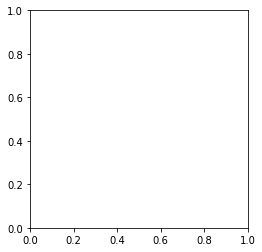

In [99]:
plt.imshow(img, cmap='gray')
plt.show()